In [30]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Задание 1. 

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию. 

In [196]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


ТАБЛИЦА КОРРЕЛЯЦИЙ

<Axes: >

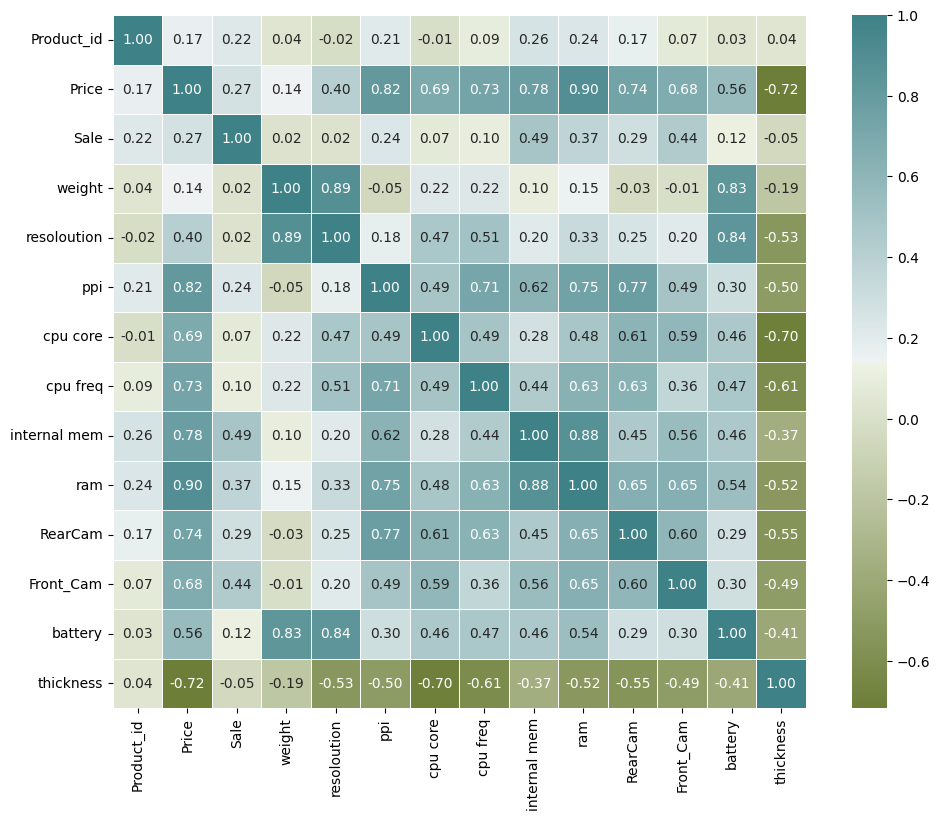

In [197]:
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

ДРОПЫ

In [198]:
data.drop('weight', axis=1, inplace=True)
data.drop('resoloution', axis=1, inplace=True)
data.drop('Sale', axis=1, inplace=True)
data.drop('Product_id', axis=1, inplace=True)
data.drop('thickness', axis=1, inplace=True)

NAN

In [199]:
data.isna().sum()

Price           0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
dtype: int64

СЛАВА БОГУ БЕЗ НАНОВ...

In [200]:
data.shape
#как будто не очень много элементов

(161, 9)

In [201]:
data.dtypes
#все в порядке

Price             int64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
dtype: object

СОБРАЛА СЕБЕ ВСЕ ДЛЯ УДОБСТВА

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#масштабирование
X = data.drop('Price', axis=1)

y = data['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)




print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))


coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')


#лассо
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2) ** 0.5)
print(regressor2.coef_,'\n')



#при разных значениях а:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')



from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

print(f'какой альфа победил:{lasso_cv.alpha_}')



#качество валидации
from sklearn.model_selection import cross_val_score
model = LinearRegression()
print(cross_val_score(model, X, y, cv = 3, scoring = 'r2').mean())



#обучили с параметром регуляризации а
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))


0.9290386139109248 0.9394549918291286
коэффициенты              0           0
0           ppi  172.115007
1      cpu core  193.994372
2      cpu freq  100.976883
3  internal mem  172.683825
4           ram  158.580071
5       RearCam    3.837389
6     Front_Cam   33.181957
7       battery   38.925175
Scores: 0.9381373760995918 224.8453290973896
[167.81548272 192.47379291  97.68840495 162.80421118 173.18678483
   0.          27.59421171  31.36052932] 

alpha=0.1
Scores: 0.9394443651659266 49487.32338717506
[172.08014773 194.02114892 100.97084115 172.64728466 158.68016191
   3.76777789  33.10781904  38.82342163] 

alpha=25.1
Scores: 0.9352921276076361 52880.61822076953
[158.82211231 188.83315409  92.02180911 149.78676196 193.42933876
   0.          17.9236187   20.49187652] 

alpha=50.1
Scores: 0.9276418400706439 59132.59220114938
[143.90582092 182.84714031  82.67679934 128.3675511  226.83498388
   0.           1.89141285   2.4687993 ] 

alpha=75.1
Scores: 0.9153736478771581 69158.413846

In [203]:
regressor3 = Ridge(alpha=lasso_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.929038612011224 0.9394538035253773


МОДЕЛЬ НЕ ПЕРЕОБУЧИЛАСЬ, ВРОДЕ НЕПЛОХО


# Задание 2. 

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change. 

In [158]:
data = pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [169]:
data.shape

(151, 11)

ДРОПЫ

In [159]:
data.drop('Date', axis=1, inplace=True)

In [161]:
data.drop('weight_oz', axis=1, inplace=True)

In [163]:
data.drop('Stone', axis=1, inplace=True)

ТАБЛИЦА КОРРЕЛЯЦИЙ

C:\Users\пк\AppData\Local\Temp\ipykernel_9524\1519879385.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

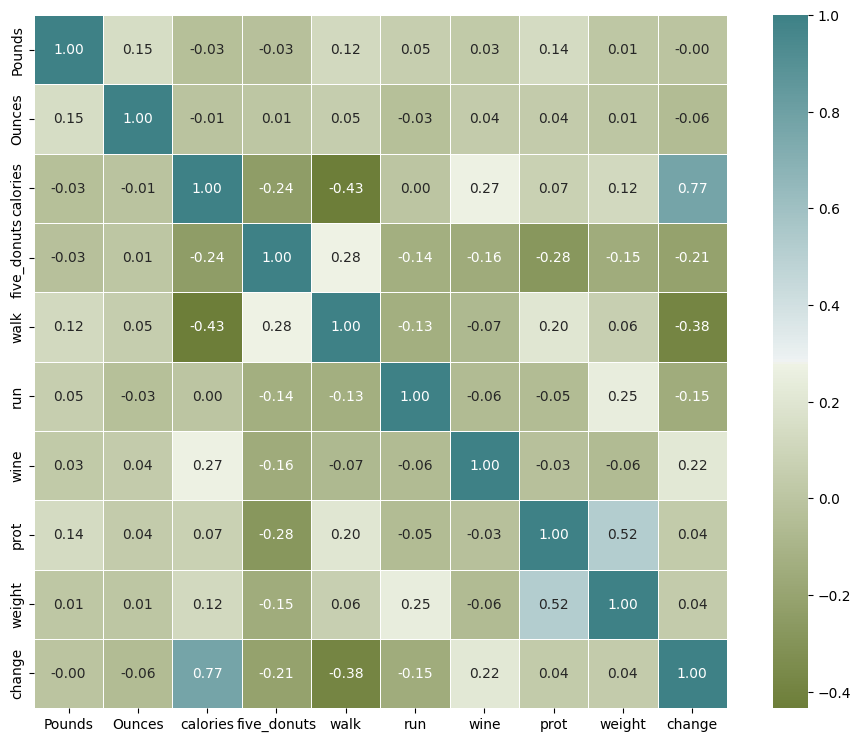

In [164]:
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

NAN

In [173]:
data.isna().sum()

Pounds         0
Ounces         0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [172]:
data = data.dropna()

ОБУЧИМ

In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#масштабирование
X = data.drop('change', axis=1)
y = data['change']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)




print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))


coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')


#лассо
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2) ** 0.5)
print(regressor2.coef_,'\n')



#при разных значениях а:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')



from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

print(f'какой альфа победил:{lasso_cv.alpha_}')



#качество валидации
from sklearn.model_selection import cross_val_score
model = LinearRegression()
print(cross_val_score(model, X, y, cv = 3, scoring = 'r2').mean())



#обучили с параметром регуляризации а
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

0.8058052859341536 0.34147368368085806
коэффициенты             0           0
0       Pounds    2.446612
1       Ounces    2.039198
2     calories -298.573632
3  cals_per_oz  317.555183
4  five_donuts   -0.854186
5         walk   -3.630706
6          run   -5.106613
7         wine   -2.320454
8         prot   -3.153470
9       weight    1.084726
Scores: 0.2287948154547238 20.159110093761498
[ 0.          0.          0.         10.15387281 -0.         -0.
 -0.          0.         -0.          0.        ] 

alpha=0.1
Scores: 0.41064643983466287 310.5622640538598
[ 6.29240669  2.46678753  0.         19.01987492 -1.52698043 -2.70006258
 -5.07534512 -1.43179397 -3.24307732  0.92758209] 

alpha=25.1
Scores: -0.1771110686172941 620.2834821428571
[ 0.  0.  0.  0. -0. -0. -0.  0.  0.  0.] 

alpha=50.1
Scores: -0.1771110686172941 620.2834821428571
[ 0.  0.  0.  0. -0. -0. -0.  0.  0.  0.] 

alpha=75.1
Scores: -0.1771110686172941 620.2834821428571
[ 0.  0.  0.  0. -0. -0. -0.  0.  0.  0.] 

какой

c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9219.462629831332, tolerance: 6.7674322580645185
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9257.64721544683, tolerance: 6.070580645161289
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\пк\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5967.2279313387735, tolerance: 4.671782978723405
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\пк\App

НУУУ, КАК БУДТО ОЧЕНЬ ГРУСТНО ТУТ ВСЕ...

In [175]:
regressor3 = Ridge(alpha=lasso_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.799589387495187 0.37695248742400345


НУ И ТУТ(L2) СООТВЕТСТВЕННО РЕЗУЛЬТАТЫ ПОХОЖИ

# Задание 3. 

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно. 

In [109]:
data = pd.read_csv('Life Expectancy Data.csv')

In [110]:
data.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [96]:
data.value_counts('Status')

Status
0    2426
1     512
dtype: int64

In [137]:
data['Status'] = data.apply(lambda x : 0 if x['Status'] == 'Developing' else 1, axis = 1)

ДРОПЫ

In [132]:
data.rename(columns = {'Hepatitis B':'Hepatitis_B', 'Life expectancy': 'Life_expectancy', 'under-five deaths ': 'under-five_deaths'}, inplace = True )
#названия дурацкие

In [136]:
data.drop(['Country', 'Year'], axis=1, inplace=True)
#убираю год и страну, они не нужны 

In [123]:
data.drop('under-five_deaths', axis=1, inplace=True)
#напрямую коррелирует с показателем детской смертности(естественно), а с продолжительностью жизни не коррелирует практически

In [130]:
data.drop(columns = ' thinness  1-19 years', axis = 1 , inplace = True)
data.drop(columns = ' thinness 5-9 years', axis = 1 , inplace = True)
data.drop(columns = 'percentage expenditure', axis = 1 , inplace = True)
data.drop(columns = 'Schooling', axis = 1 , inplace = True)
#это тоже можно убрать, сильно коррелирует с другими показателями

In [146]:
#хотела сначала чего-то сделать с численностью населения, но судя по табличке, она особо ни на что не влияет, поэтому со спокойной душой дропаю
data.drop(columns = 'Population', axis = 1 , inplace = True)

In [98]:
data.shape

(2938, 20)

ПОСМОТРИМ ТАБЛИЧКУ КОРРЕЛЯЦИЙ

<Axes: >

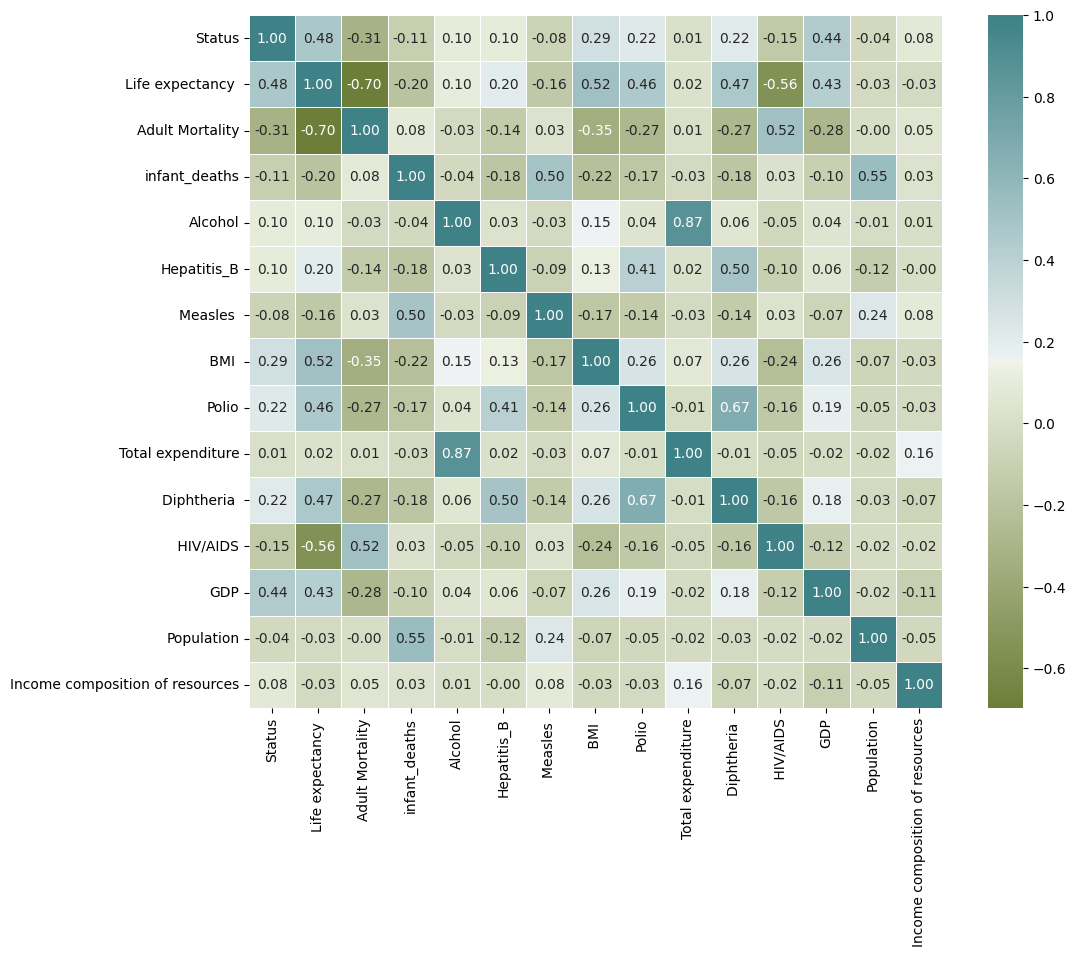

In [138]:
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

NAN

In [134]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant_deaths                      0
Alcohol                            0
Hepatitis_B                        0
Measles                            0
 BMI                               0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
Income composition of resources    0
dtype: int64

In [133]:
data.fillna(data.Hepatitis_B.mean(), inplace= True)

In [139]:
data.dtypes
#все окей

Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
Hepatitis_B                        float64
Measles                              int64
 BMI                               float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
Income composition of resources    float64
dtype: object

ПОСТРОИМ МОДЕЛЬКУ!

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#масштабирование
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)




print(r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test))


coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
print(f'коэффициенты{coefficients}')


#лассо
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2) ** 0.5)
print(regressor2.coef_,'\n')



#при разных значениях а:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')



from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

print(f'какой альфа победил:{lasso_cv.alpha_}')



#качество валидации
from sklearn.model_selection import cross_val_score
model = LinearRegression()
print(cross_val_score(model, X, y, cv = 3, scoring = 'r2').mean())



#обучили с параметром регуляризации а
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

0.7400544147041896 0.7445535744376399
коэффициенты                                  0         0
0                            Status  1.508036
1                   Adult Mortality -3.180868
2                     infant_deaths -0.467017
3                           Alcohol  0.734905
4                       Hepatitis_B -0.576285
5                          Measles  -0.351306
6                              BMI   1.726248
7                             Polio  1.100551
8                 Total expenditure -0.631083
9                       Diphtheria   1.724581
10                         HIV/AIDS -2.378297
11                              GDP  1.222578
12                       Population  0.240273
13  Income composition of resources  0.156857
Scores: -0.00010611248451919408 9.356061312883446
[ 0. -0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0.] 

alpha=0.1
Scores: 0.7460614499918805 22.22637678039083
[ 1.54160804 -3.1600956  -0.26795757  0.0917174  -0.38356061 -0.2886767
  1.75751128  1.0517304

Кажется результат - ничего, модель не переобучилась!

In [147]:
regressor3 = Ridge(alpha=lasso_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))



Scores: 0.7400544146998521 0.7445536396872157


результаты для L2 регуляризации практически не отличаются от L1 